## Supervised Learning Module

### Week 4 - Regression

### What is learning in Machine Learning?

1. Gathering a training dataset
2. Building a model based on the training dataset
3. Applying the model to new data and making predictions

We can distinguish: supervised, semi-supervised, unsupervised, and reinforcement learning.

### What is Supervised Learning?

In supervised learning the examples in the dataset are **labeled**.

The dataset $X$ contains $N$ examples.
Each example $x_i$ is represented by a feature vector of dimensionality D: $ x^{(j)} $, $j = 1..D$, meaning that there are D features. A feature can be viewed as a variable.

The **labeled** dataset has a vector of labels $y$ of dimensionality $N$:  $\{(x_i, y_i)\}^{N}_{i=1}$

### Formulation of regression problems

In regression problems the labels in the dataset are **numeric variables** of type int, float, taking **continuous** values. In other words they are not categoric variables. In statistics labels are called response variables.

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target  # note that the labeles are also called targets

In [2]:
# !pip install --upgrade seaborn

In [3]:
X.shape   # how many examples, how many features in each feature vector?

(506, 13)

In [4]:
X[0:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [5]:
y.shape   # as many labels as examples

(506,)

In [6]:
y[0:3]

array([24. , 21.6, 34.7])

In [7]:
%matplotlib inline

import pandas as pd
import seaborn as sb

d = pd.DataFrame(X)
d['y'] = pd.Series(y)
sb.pairplot(d)

ModuleNotFoundError: No module named 'seaborn'

Note that some features could be categorical variables

In [8]:
sb.regplot(d[12], "y", data=d, ci=None)

NameError: name 'sb' is not defined

### Machine Learning methods to solve regression problems

We will consider the following methods in this class:

- Linear Regression
- Nearest Neighbors
- Decision Tree
- Random Forest
- Gradient Boosting

Various regularization techniques for regression: Ridge, LASSO will be considered in the next class.

Other methods capable of both regressions and classification we will consider in the classification class.

Neural networks will be considered in Deep Learning module.

### Linear regression and closed form solution

We want to build a model $$f_{w, b}(x) = wx + b$$

so that it would predict us the label given new data $$y = f_{w,b}(x_{new})$$




We can formulate the training process as a linear algebra problem:

$$ y=w^TX + b$$

$ w $ are the parameters of the model that we are trying to **learn** in the **training** process.

For $b=0$, $w$ could be solved with:

$$ w = (X^TX)^{-1}X^Ty $$

However, that finding the inverse $(X^TX)^{-1}$ matrix may not be always possible.

In [9]:
import numpy as np
# calculate coefficients using closed-form solution
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

w.shape
#linear algrebra underlies all of these functions 

(13,)

In [ ]:
import numpy as np
# calculate coefficients using closed-form solution
w = np.linalg.inv(X.T@X)@X.T@y
#this line translates the upper function into code 

#each variable gets a weight 
#our challenge is to find which of these weights 

In [10]:
w

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

**Loss function** measures how good we predict each example. Squared error is commonly used.

$$ SE = (f_{w,b}(x_i)- y_i)^2$$
for example $i$.

outputs are predictions, algotirithms are just functions, this allows us to do supervised learning 

In [113]:
i = 80
b = 0 
se = (w.T.dot(X[i]) + b - y[i])**2
se

0.46685390150683787

**Cost function** is loss function for all the training examples. We will use Mean Squared Error
$$ MSE = \frac{1}{N}\sum_{i=1..N}{(f_{w,b}(x_i) - y_i)^2} $$

$$ MSE = \frac{1}{N}\sum_{i=1..N}{((wx_i + b) - y_i)^2} $$

We can find the parameters $w$, $b$ that minimize **cost function** by solving an optimization problem

### Gradient descent method
Gradient shows direction towards the minimum:
$$ \frac{dMSE}{dw} =  \frac{1}{N}\sum_{i=1..N}{-2x_i(y_i - (wx_i + b))} $$

$$ \frac{dMSE}{db} = \frac{1}{N}\sum_{i=1..N}{-2(y_i - (wx_i + b))}$$


By updating $w$ and  $b$ over multiple iterations we converge to the optimal values.
We can control the rate of convergence $\alpha$

$$ w_{updated} = w_{previous} - \alpha\frac{dMSE}{dw} $$

$$ b_{updated} = b_{previous} - \alpha\frac{dMSE}{db} $$

update weights and intercepts as we go through iterations of the linear reg, the coefficents set in a wa tht the cost function is minimzed (mimnimized error) 

You can now implement linear regression with gradient descent. Rate of convergence $\alpha$ is a hyperparameter.
Gradient descent will allow to use any cost function for which we can express its derivative. Think about other cost functions.

linear regression is one of the few that you dwon't adjust yoir parameters to improve the model 

Can you identify by looking at the cost function that normalization of data is critical for Linear Regression or not?

### Sklearn implemenentation



In [10]:
from sklearn.linear_model import LinearRegression

# init
lr = LinearRegression(fit_intercept=False) #here we set it to 0 to be the same as numpy 

# Learning
lr.fit(X, y)

# Learned model w and b:
lr.coef_, lr.intercept_

(array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
        -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
         1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
        -4.16304471e-01]), 0.0)

In [12]:
lr.score #metric to evaluate performance 

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)>

In [15]:
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y) #shift + tab to see the method that is occuring 

0.7137381380515404

In [11]:
np.isclose(w, lr.coef_) #are they close enough to be the same and yes they are

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
lr.score

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# "predictions" based on the training dataset
y_model = lr.predict(X)  # f(x)
mean_squared_error(y, y_model)  # MSE, what do you compare this too?
r2_score(y, y_model)
#allows for the formation of a naive model 
#predicts the same thing regardless of the predictors 
#what is the baseline model???????



0.7137381380515404

In [20]:
mean_squared_error(y,y_model) #mse

24.166099330126492

In [21]:
r2_score(y, y) #mse 

1.0

In [26]:
r2_score(y, y_model) #mse

0.7137381380515404

In [27]:
r2_score(y, y_avg) #mse, allows us to test the validity of our model 

0.0

this works ok but not always the best predictor, the mean isn't always the best way to go but it is usually good cause its within the range, the median is also a good gauge 

In [23]:
#activity 
# we want something to compare to without any previous data 

y_avg=[np.average(y)] *len(y)



In [24]:
#asses the base model

mean_squared_error(y, y_avg) #MSE

84.41955615616556

In [25]:
np.sqrt(mean_squared_error(y, y_avg)) #root mean squared 

9.188011545278203

In [ ]:
np.sqrt(mean_squared_error(y, y_model))#root mean squared

### Making predictions on new data

In [120]:
# x_new = X[100] * 0.01*np.random.random()  # new example

x_new = np.array([0.01]*13)
print(x_new)

w = lr.coef_
b = lr.intercept_
y_new = np.dot(w, x_new) + b
y_new

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


0.042578503213361665

In [125]:
# or simply: the sci kit learn tool kit 
# lr.predict(x_new.reshape(1, -1))
lr.predict([x_new, ])

array([0.0425785])

its the same result regardless

### How data normalization effects linear regression

In [29]:
x=5 


In [30]:
x *=5; x #take x mult by x and mult by 5 then reassign to itself 

25

In [33]:
x= x *5; x

3125

In [ ]:
from sklearn import mean_abolute_error 
from sklearn import median_absolute_error

In [34]:
from sklearn.preprocessing import normalize

X_copy = X.copy() #copies the value
X_copy[5] *= 1000000 #mult by 1000000
X_copy[4] *= 0.000001 #re-assigns to the value 
X_copy[12] *= 0.0001
y_model = LinearRegression(fit_intercept=False).fit(X_copy, y).predict(X_copy)
mean_squared_error(y, y_model)

109.6863509956637

scale matter for linear regression 

In [35]:
X_norm = normalize(X_copy)
y_model = LinearRegression(fit_intercept=False).fit(X_norm, y).predict(X_norm)
mean_squared_error(y, y_model)

21.6410630103583

In [ ]:
mean_absolute_error(y, y_model)#this methods provide a mechanism to compare these diff models and understand how they're performing 

how the base model 

higher-mean squared error means that its bad compared to what 


these sre all diff cost functionsq, how mucsh loss withbeach model 

for score the higher the score the better 

0 error would be a perfect model 
the base model is what we use to measure, gives us the point of relativity 

a baseline model for classification use MODE - the most frequent observation 

here mode does not make sense for these floating point data 

you have model 
base model - higher 
model just guessing and 
a perfect model 

### How outliers affect linear regression?

### Regression with Nearest Neighbors
How do we find nearest neighbor?

How many nearest neighbors?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/500px-KnnClassification.svg.png)

In [2]:
X.shape

NameError: name 'X' is not defined

for a pount it sees for the firsr time looks back on data it was trained on and say what are the 2 closest points 

the 2 red triangles in the center are closet 
for regression take an average od whatevr their y's are 

we dont know green but we know red, so we average these values and say this must be what the green circle is 

if we say 3 then the nearest three things -

clasification predict the continous outcome

take these 3 and average their y's 

this is a simpel model but has some disdvantages is that the algorithm must crry all the trainign data and look up those values, requires mode or mean = prediction 
carries a numoy and the array to which it was trained to look up the answer each time 

run linear regression with nothing to tune, we have a hyper parneter to set  whichbis K (the solid line) tke rhe mde for cloasswification or mean for prediction 

how do we know what to set k as? hyper training to pick the right k - there will be a logical stopping points 
if k is set to the # of datapoints- predicting median for model,this is our baseline model 


this is when you use elbow, optimal k is the inflection point because between loss and gain - this is determined by training data

eucledian distance= if we talk about points on a number line 

manhattan distance- between 1 pt and another straight line 

in 2d we need a new rule run/rise then add togherhe manhattan 

pythagorean theorm (eucledian distsnce) 

which one = eucledian distance 

In [ ]:
from scipy.spatial.distance import euclidean

euclidean(X[0], X[1])

In [3]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X) #fit the model to x then indicies 
distances, indices = nbrs.kneighbors(X)

NameError: name 'X' is not defined

In [ ]:
nbrs

In [169]:
# distances to 3 closest neighbors
distances

array([[ 0.        , 16.0970999 , 16.99995447],
       [ 0.        , 15.39261599, 18.97631935],
       [ 0.        ,  8.07879279,  8.89317332],
       ...,
       [ 0.        ,  3.94748354,  9.40019876],
       [ 0.        ,  3.94748354,  8.83081803],
       [ 0.        ,  4.2784823 ,  9.31201061]])

In [171]:
# indices of 3 closest neighbors
indices

array([[  0, 241,  62],
       [  1,  47,   2],
       [  2,  85,  87],
       ...,
       [503, 504, 219],
       [504, 503, 219],
       [505, 502, 504]])

Because the query set matches the training set, the nearest neighbor of each point is the point itself, at a distance of zero.
It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

In [40]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [4]:
from sklearn.neighbors import KNeighborsRegressor

nnr = KNeighborsRegressor(n_neighbors=3) #if we change this to 1 the blue and orange are right on top of each other 
nnr.fit(X, y)

NameError: name 'X' is not defined

In [ ]:
nnr.score(X, y) #having a k of 1 is usually not really the best way to asses this model 

What is the model in case of Nearest Neighbors?

In [174]:
y_pred_nn = nnr.predict(X)

In [ ]:
varname = d.columns[12]

x will be the values for the lsat 

In [5]:
d.columns[12]

NameError: name 'd' is not defined

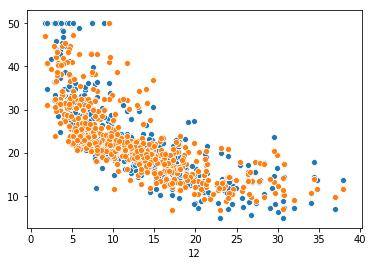

In [175]:
sb.scatterplot(d[12], y)
sb.scatterplot(d[12], y_pred_nn)

when the dots are on top of each other it is working well 

# Notice how KNN handles nonlinearity!

Also, what does NNR(n_neighbors=1) mean?

In [176]:
indices = np.random.randint(2, size=X.shape[0]).astype(bool)
# indices

In [177]:
#np.logical_not(indices)

55.813115468409585

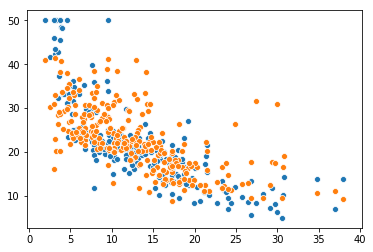

In [178]:
X_train = X[indices]
X_test = X[np.logical_not(indices)]
y_train = y[indices]
y_test = y[np.logical_not(indices)]

nnr = KNeighborsRegressor(n_neighbors=3)
nnr.fit(X_train, y_train)
y_pred_nn = nnr.predict(X_test)

sb.scatterplot(X_test[...,12], y_test)
sb.scatterplot(X_test[...,12], y_pred_nn)

mean_squared_error(y_test, y_pred_nn)

In [ ]:
sb.scatterplot(X_train[...,12], y_train)
y_pred_nn_train = nnr.predict(X_train)
sb.scatterplot(X_train[...,12], y_pred_nn_train)

What are the main hyperparameters of KNN Regressor?
- distance metric
- K

### Rule-based model:
Regression with decision tree

How a tree is built?

Hyperparameters: tree depth, cutoff

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528907338/regression-tree_g8zxq5.png)

if its true we go to the left if false we go to the right 

searching for the optimal k 


In [ ]:
# Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create knn instance 
knn = KNeighborsClassifier()
# Create grid search instance 
gscv = GridSearchCV(knn, {"n_neighbors": range(1, 52)}, cv=kf, n_jobs=-1)
gscv.fit(X_scaled, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
# Get plot data
plot_df = cv_df.loc[:, ["param_n_neighbors", "mean_test_score"]]
# Get k values versus mean_test_scores
plot_df.plot.line(x="param_n_neighbors", y="mean_test_score");

cross validation - trai test split multiple times 

we can take a portion of our data for training and the rest is for testing 

5 fold cross validation (k fold cross validation) 

leave 1 out cross validation - train on all but 1 observation and use observation to test 
having the number of folds =n # of observations 

5 is usually sufficient 

eval how well they're perfoming 

grid search allows you to check a lot of parameters 

ig you have a lot of hyper parameters means more to test 

grid search -tests each single combo of hyper parameters 

In [156]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
dtr = DecisionTreeRegressor(max_depth=5)

# Fit
dtr.fit(X_train, y_train)

# Predict
y_predicted = dtr.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

25.001178022067204

how deep we wanna grow our tree 

basically draws until classification have the majortity class in a diff class be the partition 

regression - looks in partion and average all samples within that partition  

the # of splits is the depth, how deep we grow our tree 
roots on top, termial nodes are the leaves 
we take the average of the pointd (.87) and this is the prediction, when these 2 rules are fulfilled 

the split that gives us the best averages with the least error 

looks at all splits for the parameters and see what splits results in the lowest loss
then cont making steps until we tell it to stop 

for ex 5 max= 5 splits and thats it otherwise makes splits untikl eqchb observation has its onw node - fully grown tree this would be overfitting the datav 

### Ensemble methods

collection of weak (poor performing) models makes a strong and robust model

### Ensemble methods: bagging - Random Forest

![](https://dsc-spidal.github.io/harp/img/4-5-1.png)

Features:
    - sampling of training examples with replacement
    - subsampling the features
    - shallow trees

In [160]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Fit 
rf.fit(X_train, y_train)

# Predict
y_predicted = rf.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


17.918512295081968

### Ensemble methods: boosting - Gradient Boosting
Sequential improvement of models by training on their errors

![](https://littleml.files.wordpress.com/2017/03/boosted-trees-process.png?w=992)

See also: http://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html


In [161]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

# Fit 
gbr.fit(X_train, y_train)

# Predict
y_predicted = gbr.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

12.666934741997123

### Homework assignment